In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


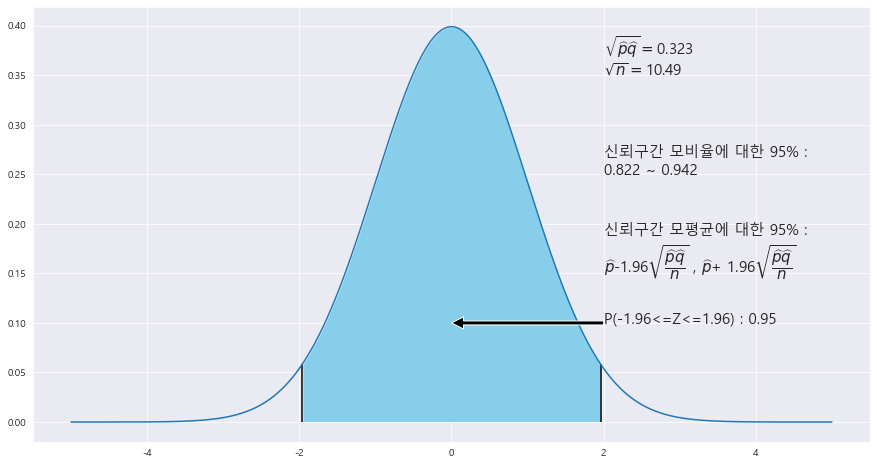

In [2]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)

RATIO = 0.882
n = 110

# print((z_1 * STDS / math.sqrt(len(A))))
ax.text(2 , .25, f'신뢰구간 모비율에 대한 {trust}% : \n' + f'{round(RATIO - z_1*math.sqrt(RATIO * (1-RATIO) / n) ,3)} ~ {round(RATIO + z_1*math.sqrt(RATIO * (1-RATIO) / n),3)}' , fontsize= 15)


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)

print(z_1)

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.7188


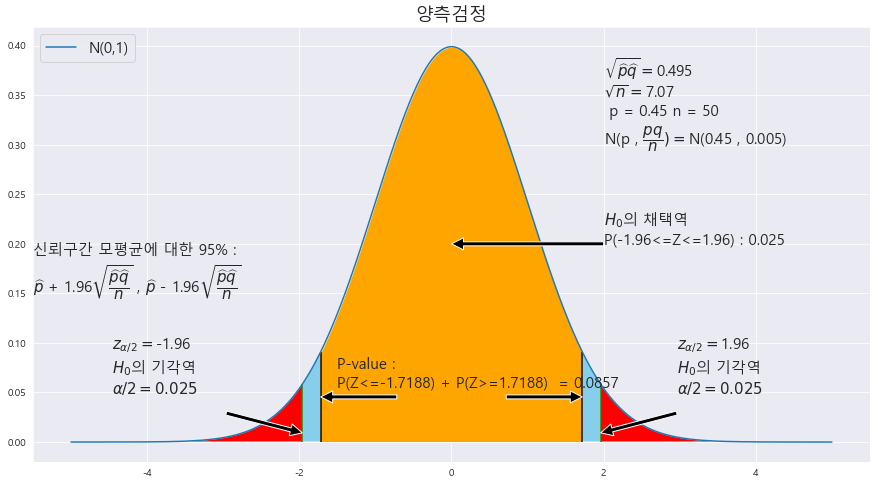

In [28]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(642/1500 , 4)
n = 1500
MEANS = 0.45
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)
n = 50

#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) | (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(-1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={z_1}) + P(Z>={-z_1})  = {round(1-area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,4)})',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-1.7188


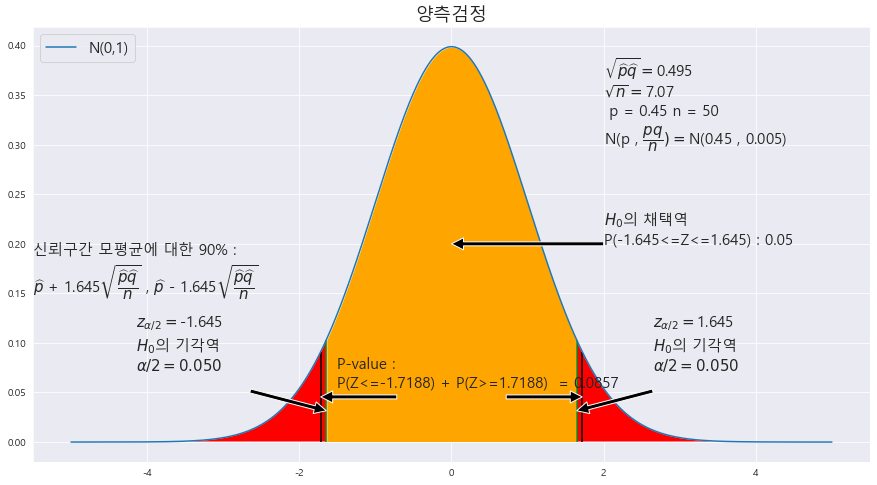

In [29]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

ax.set_title('양측검정' ,fontsize = 18)
RATIO = round(642/1500 , 4)
n = 1500
MEANS = 0.45
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)
n = 50

#==========================================귀무가설 기각과 채택 ====================================================
trust = 90 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))


ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)



# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % t_1,fontsize=15)


#============================================표본평균의 정규분포화 =========================================================

z_1 = round((RATIO-MEANS)/STDS,4)
print(z_1)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) | (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) - scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(-1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-value : \nP(Z<={z_1}) + P(Z>={-z_1})  = {round(1-area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)




ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,4)})',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.8834


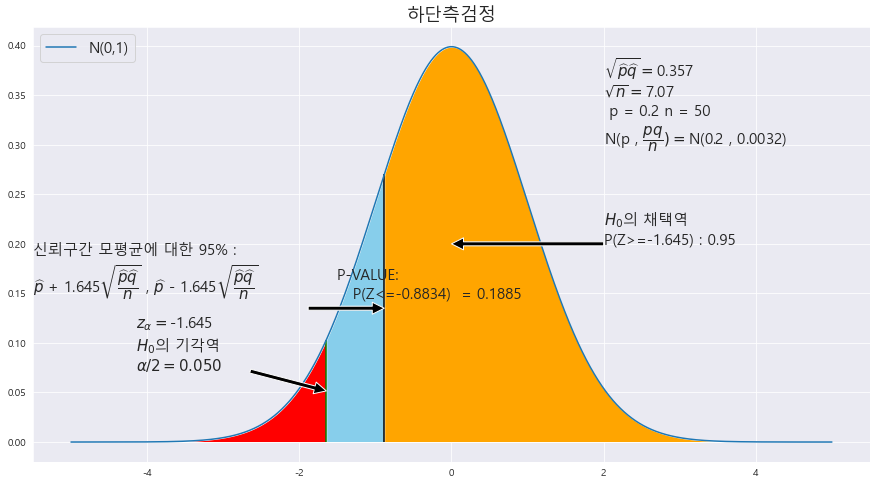

In [46]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도
RATIO = round(0.15 , 4)
n = 50
MEANS = 0.2
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1-(1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
# ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)
#
# ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)
#
# ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)
ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
# ax.text(-5.5 , .25, f'귀무가설 : 남자(u_1)의 입원일수가 여자(u_2)의 입원일수 보다 작다.\n u_1 < u_2'  , fontsize = 15)
ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,4)})',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round( (RATIO-MEANS)/STDS , 4)
# z_1 =(9.075 - 7.114) / 1.6035
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-t_1)  , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n   P(Z<={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')
#
# print( (9.075 - 7.114) / 1.6035)

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-2.7933


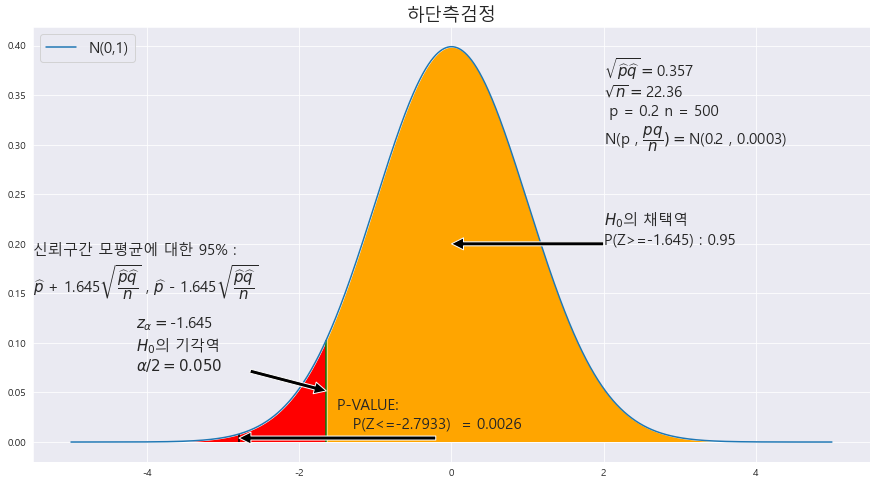

In [51]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도
RATIO = round(0.15 , 4)
n = 500
MEANS = 0.2
STDS = round(math.sqrt((MEANS * (1-MEANS) / n)),4)


ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1-(1-(trust/100))) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area) ,3)
# ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



# ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)
#
# ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)
#
# ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)
ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f' + {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f' - {t_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)
# ax.text(-5.5 , .25, f'귀무가설 : 남자(u_1)의 입원일수가 여자(u_2)의 입원일수 보다 작다.\n u_1 < u_2'  , fontsize = 15)
ax.text(2 , .3,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)} \n p = {MEANS} n = {n} \n' + r'N(p , ' + r'$\dfrac{pq}{n}) = $' + f'N({MEANS} , {round(MEANS*(1-MEANS)/ n ,4)})',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round( (RATIO-MEANS)/STDS , 4)
# z_1 =(9.075 - 7.114) / 1.6035
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=-t_1)  , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(-z_1- 3 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n   P(Z<={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')
#
# print( (9.075 - 7.114) / 1.6035)